In this project, i worked on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.

Dataset link : https://www.kaggle.com/datasets/arjunbhasin2013/ccdata


Columns explanation :

CUST_ID: Identification of Credit Card holder (Categorical)

BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES: Amount of purchases made from account

CASH_ADVANCE: Cash in advance given by the user

CREDIT_LIMIT: Limit of Credit Card for user

PAYMENTS: Amount of Payment done by user


# Importing Libraries and Loading Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

In [ ]:
#import dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load dataset
df = pd.read_csv("/content/drive/MyDrive/Untitled folder/DATASETS/Credit_card_dataset.csv")

# Make a copy of the original dataframe
df1 = df.copy()

# Data Exploration and Preparation


In [ ]:
df.head()
#df.tail()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [ ]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


<function matplotlib.pyplot.show(close=None, block=None)>

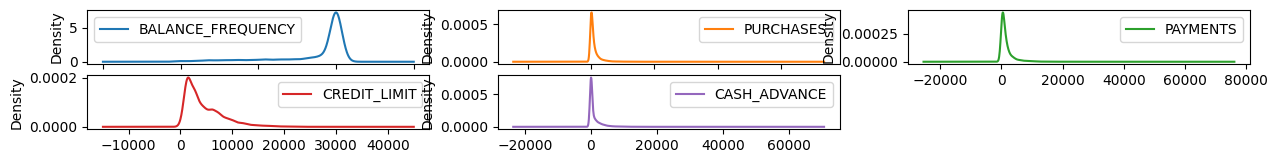

In [ ]:
df.plot(kind='density', subplots=True, sharex=False, layout=(12,3), figsize=(15,10))
plt.show

In [ ]:
# Check for missing values and handle corrupted data if any
# Check for missing values
df.isnull().sum()


,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,1
CASH_ADVANCE,0


In [ ]:
# "CREDIT_LIMIT" has 1 missing value.
# drop rows with missing values in the column named 'CREDIT_LIMIT'
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [ ]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,0
CASH_ADVANCE,0


In [ ]:
# Handle missing values or corrupted data (e.g., using imputation or removal)

# Remove duplicates, if they exist
df.duplicated().sum()

# The dataframe has no duplicated rows


0

In [ ]:
# CUST_ID contains categorical features,label encoding
# Encode categorical data to convert them into numerical format

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['CUST_ID'] = encoder.fit_transform(df['CUST_ID'])

<Axes: xlabel='PURCHASES'>

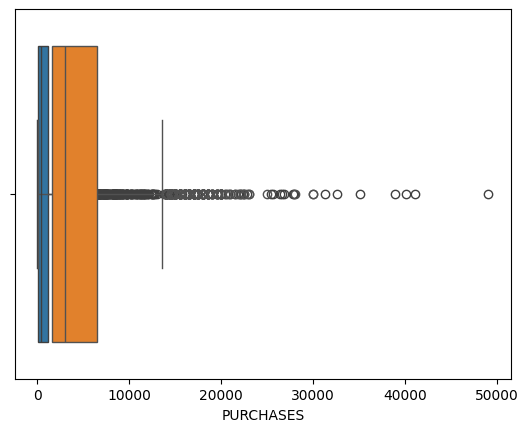

In [ ]:
# Handle outliers (optional but can be crucial for clustering)
# Visualization Methods: Box plots, scatter plots, or histograms can visually highlight potential outliers.
# Box plot for outlier visualization of the 5 numerical columns to identify outliers

#sns.boxplot(x=df['CUST_ID'])
#sns.boxplot(x=df['BALANCE_FREQUENCY'])
sns.boxplot(x=df['PURCHASES'])
#sns.boxplot(x=df['PAYMENTS'])
sns.boxplot(x=df['CREDIT_LIMIT'])
#sns.boxplot(x=df['CASH_ADVANCE'])


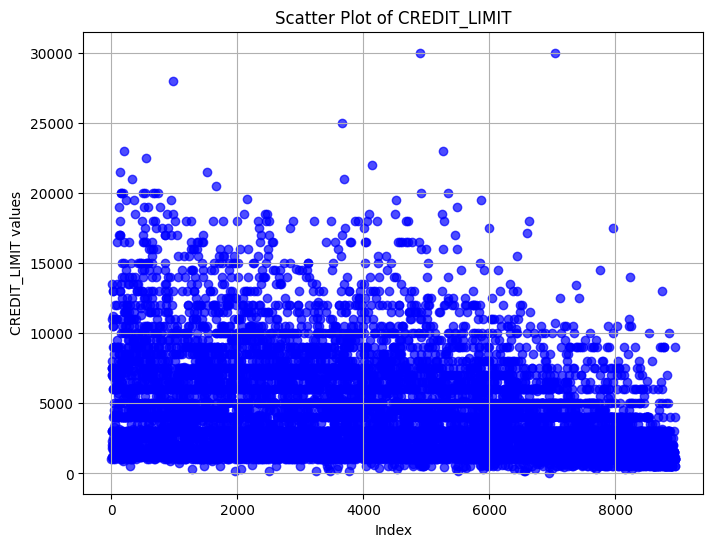

In [ ]:
# Create a scatter plot for 'CREDIT_LIMIT'
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df['CREDIT_LIMIT'])), df['CREDIT_LIMIT'], alpha=0.7, color='blue')
plt.title('Scatter Plot of CREDIT_LIMIT')
plt.xlabel('Index')
plt.ylabel('CREDIT_LIMIT values')
plt.grid(True)
plt.show()


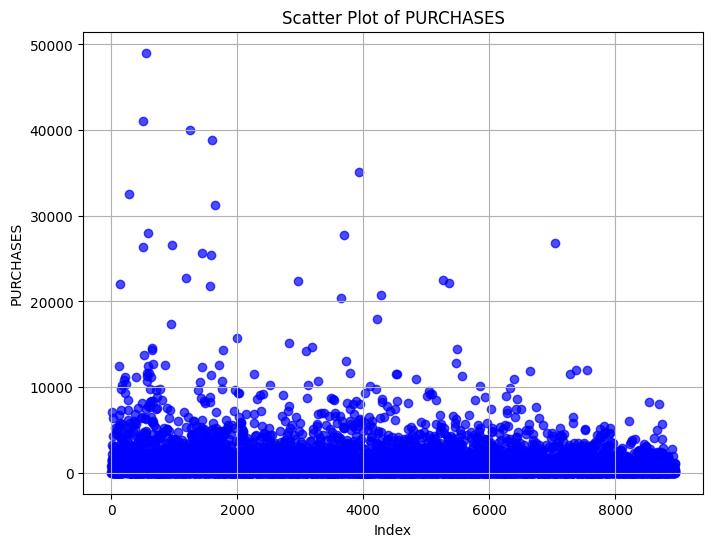

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df['PURCHASES'])), df['PURCHASES'], alpha=0.7, color='blue')
plt.title('Scatter Plot of PURCHASES')
plt.xlabel('Index')
plt.ylabel('PURCHASES')
plt.grid(True)
plt.show()

In [ ]:
from scipy import stats

# Define a function to handle outliers using the Z-score method
def handle_outliers_zscore(df, columns, z_threshold=3):
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers = df[(z_scores > z_threshold)]
        df = df[(z_scores <= z_threshold)]
        print(f"Outliers removed in column '{col}': {len(outliers)}")
    return df

# Define the columns you want to handle outliers for
columns_to_handle_outliers = ['PURCHASES', 'CREDIT_LIMIT']

# Handle outliers in the specified columns
df_cleaned = handle_outliers_zscore(df, columns_to_handle_outliers)

# df_cleaned now contains the DataFrame with outliers removed

# i will proceed with further analysis and modeling using df_cleaned

Outliers removed in column 'PURCHASES': 135
Outliers removed in column 'CREDIT_LIMIT': 150


In [ ]:
df_cleaned.head()
df_cleaned.describe()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000
mean,4535.976223,0.875723,797.154927,1519.660907,4169.266866,951.901097
std,2576.500964,0.237996,1164.566069,2180.663983,3095.786836,1934.436914
min,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000
25%,2315.750000,0.875000,31.837500,371.867155,1500.000000,0.000000
50%,4562.500000,1.000000,343.215000,813.968743,3000.000000,0.000000
75%,6775.250000,1.000000,1027.450000,1778.394507,6000.000000,1112.758123
max,8948.000000,1.000000,7394.180000,34107.074990,14600.000000,27296.485760


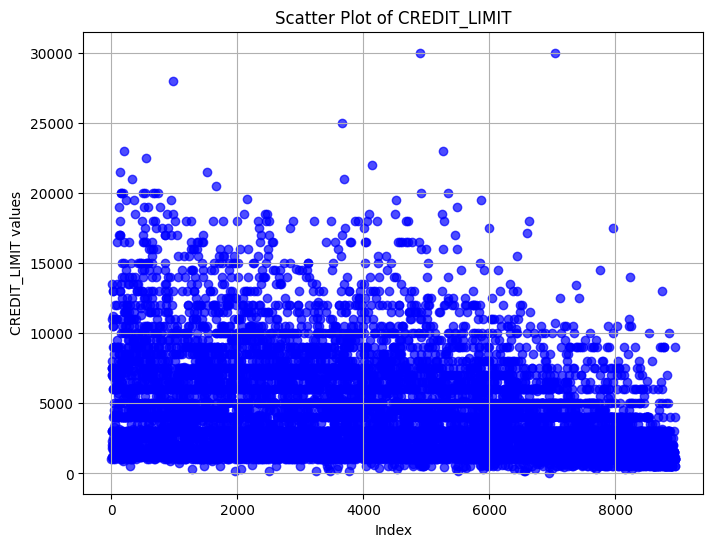

In [ ]:
# Create a scatter plot for 'CREDIT_LIMIT' after handling outliers
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df['CREDIT_LIMIT'])), df['CREDIT_LIMIT'], alpha=0.7, color='blue')
plt.title('Scatter Plot of CREDIT_LIMIT')
plt.xlabel('Index')
plt.ylabel('CREDIT_LIMIT values')
plt.grid(True)
plt.show()

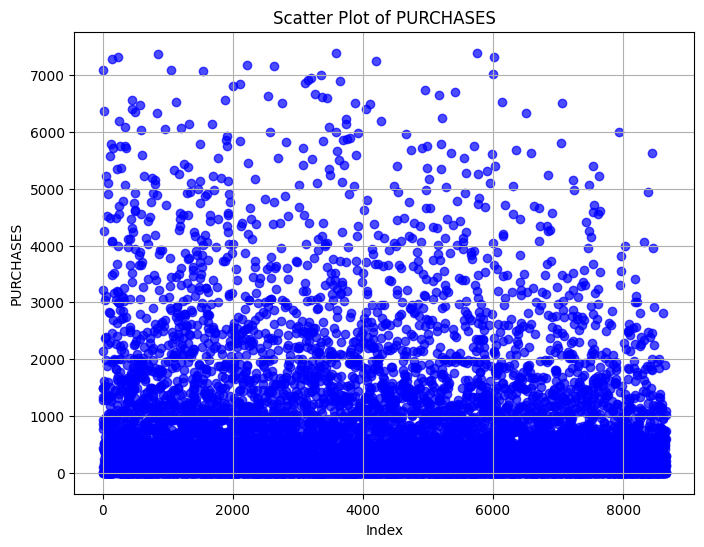

In [ ]:

# Create a scatter plot for 'PURCHASES' after handling outliers
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df_cleaned['PURCHASES'])), df_cleaned['PURCHASES'], alpha=0.7, color='blue')
plt.title('Scatter Plot of PURCHASES')
plt.xlabel('Index')
plt.ylabel('PURCHASES')
plt.grid(True)
plt.show()

Hierarchical Clustering


## Scaling
Before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important?. Normalization is a preprocessing technique used to transform data before feeding it into machine learning models

Normalization (normalize function): Normalization rescales each sample (row in the dataset) independently to have a unit norm.
The norm calculation is done on a per-sample basis, ensuring that each row's values are rescaled proportionally such that the Euclidean norm (L2 norm) of each row becomes 1.
It's suitable for scenarios where the direction or relative relations of the samples' features are more important than their magnitudes.

So, let's normalize the data and bring all the variables to the same scale

In [ ]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df_cleaned)

In [ ]:
df_scaled

array([[0.00000000e+00, 7.98530074e-04, 9.31085860e-02, 1.96954997e-01,
        9.75980985e-01, 0.00000000e+00],
       [9.65175319e-05, 8.77432196e-05, 0.00000000e+00, 3.96014579e-01,
        6.75622723e-01, 6.21857196e-01],
       [2.64362620e-04, 1.32181310e-04, 1.02198624e-01, 8.22255970e-02,
        9.91359826e-01, 0.00000000e+00],
       ...,
       [9.93642028e-01, 9.25592100e-05, 1.60386663e-02, 9.02683408e-03,
        1.11071096e-01, 0.00000000e+00],
       [9.98416620e-01, 9.29935752e-05, 0.00000000e+00, 5.86417262e-03,
        5.57961674e-02, 4.07967940e-03],
       [9.83819409e-01, 7.32990539e-05, 1.20201226e-01, 6.94494305e-03,
        1.31938231e-01, 1.39678616e-02]])

 Next, i converted the normalized data stored in "df_scaled" and create a new DataFrame "df_scaled" with the same column names as the original DataFrame "df_cleaned". This DataFrame will be utilized for further analysis.

In [ ]:

df_scaled = pd.DataFrame(df_scaled, columns=df_cleaned.columns)
df_scaled.head()


,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.000000,0.000799,0.093109,0.196955,0.975981,0.000000
1,0.000097,0.000088,0.000000,0.396015,0.675623,0.621857
2,0.000264,0.000132,0.102199,0.082226,0.991360,0.000000
3,0.000392,0.000083,0.195919,0.000000,0.980251,0.026897
4,0.002902,0.000725,0.011606,0.492063,0.870477,0.000000


In [ ]:
df_scaled.describe()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000
mean,0.630229,0.000143,0.106353,0.187123,0.542467,0.107659
std,0.311572,0.000097,0.136436,0.175333,0.275141,0.168869
min,0.000000,0.000000,0.000000,0.000000,0.004259,0.000000
25%,0.362673,0.000091,0.004784,0.059878,0.299590,0.000000
50%,0.712683,0.000121,0.050383,0.128378,0.544232,0.000000
75%,0.922243,0.000164,0.154196,0.256140,0.793279,0.166005
max,0.998785,0.000954,0.833943,0.953346,0.999762,0.871245


# Feature Selection

In [ ]:
# Selecting features for clustering
selected_features = ['PURCHASES', 'CREDIT_LIMIT']
X = df_scaled[selected_features]

Creating a Dendrogram and Identifying the numbers of clusters

After feature selection, we can see that the scale of all the variables is almost similar. Now, we are good to go. Next,I plotted the dendrogram to help decide the number of clusters.


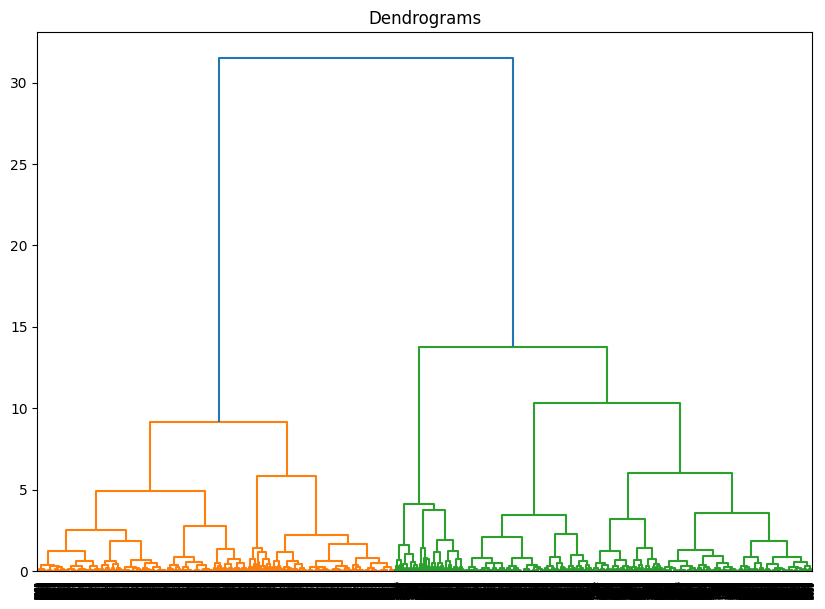

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
plt.xticks(rotation = 45)
dend = shc.dendrogram(shc.linkage(X, method="ward"))
plt.show()

The X-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 15 and cut the dendrogram.

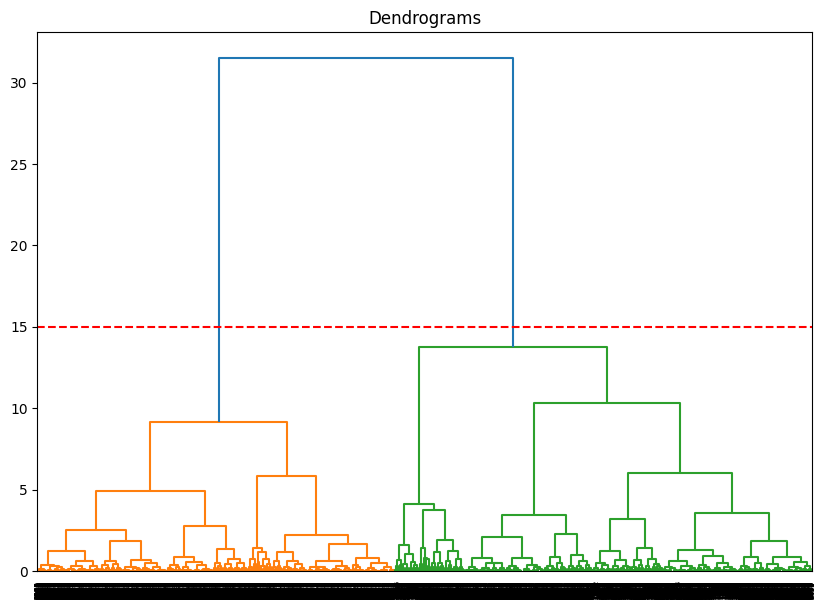

In [28]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method="ward"))
plt.axhline(y=15, color= "r", linestyle= "--")

We have two clusters as this line cuts the denndrogram at two points. Let's now apply hierarchical clustering for 2 clusters.

In [30]:

# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')  # Remove the 'affinity' parameter
cluster_labels = hc.fit_predict(X)  # Fit the model and predict cluster labels

#The fit_predict() method fits the hierarchical clustering algorithm to the dataset X and returns the cluster labels assigned to each data point.

cluster.labels_ is an attribute that stores these cluster assignments. It's a 1-dimensional array or list where each element corresponds to a data point in your dataset, indicating which cluster that particular data point belongs to

In [31]:
hc.labels_

array([0, 0, 0, ..., 1, 1, 1])

We can see the values of 0s and 1s in the outtput since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents the points in the second cluster. Let's now visualize the two clusters:

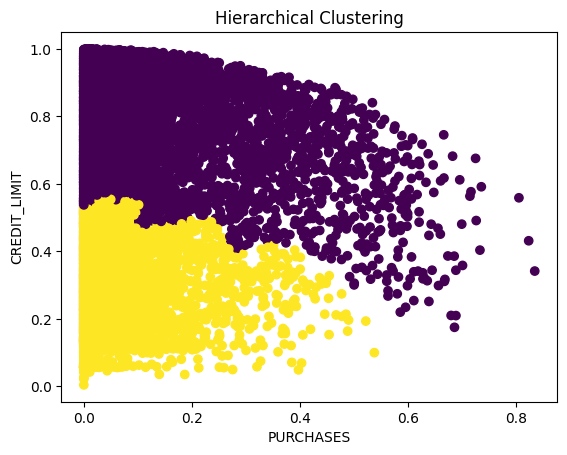

In [32]:
# Plot the clusters (for 2D visualization)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=hc.labels_, cmap='viridis')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.title('Hierarchical Clustering')
plt.show()

Awessome! We can clearly visualize the two clusters here. This is how we can implement hierarchical clustering in Python
Hierarchical clustering is a super useful way of segmenting observations.

# K-MEANS CLUSTERING

The first step in performing customer segmentation using KMEANS Clustering algorithmn is choosing the number of clusters. To achieve this, i'd use WCSS

WCSS -> Within Clusters Sum of Squares

Within cluster sum of squares:

The sum of the squared deviations from each observation and the cluster centroid.
Interpretation The within-cluster sum of squares is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares. Clusters that have higher values exhibit greater variability of the observations within the cluster.

However, similar to sums of squares and mean squares in ANOVA, the within-cluster sum of squares is influenced by the number of observations. As the number of observations increases, the sum of squares becomes larger. Therefore, the within-cluster sum of squares is often not directly comparable across clusters with different numbers of observations. To compare the within-cluster variability of different clusters, use the average distance from centroid instead

In [33]:
for i in range(1, 11):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [34]:
# finding wcss(minimum) value for different number of clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init= "k-means++", random_state=42)
    kmeans.fit(X)
    print(kmeans.inertia_)

    wcss.append(kmeans.inertia_)# Getting a WSS value for each cluster

817.0705350087165
308.3291528981894
221.30185485636645
143.44118263233506
117.20655236661646
92.5350329094735
81.6575909071984
70.46663446953511
63.03599345187787
55.228420347383015


# The Elbow Graph/Method

The Elbow Method is a heuristic technique used to determine the optimal number of clusters (K) in a dataset for clustering algorithms like K-means. It helps in identifying the point where the addition of more clusters does not explain much more variance in the data.

Here's how the Elbow Method works:

Variance Explained vs. Number of Clusters (K): The Elbow Method involves plotting the variance (often called inertia or distortion) as a function of the number of clusters.

Inertia or Distortion: In K-means clustering, inertia (or within-cluster sum of squares) measures how internally coherent clusters are. It quantifies the sum of squared distances between each data point and its centroid within a cluster.

Elbow Point: When the number of clusters (K) increases, the inertia typically decreases, as each cluster becomes more compact. However, at a certain point, the rate of decrease sharply changes, forming an 'elbow' shape in the plot.

Optimal K: The optimal number of clusters is often considered to be at the 'elbow' of the plot. It's the point where the rate of decrease in inertia sharply decreases and adding more clusters doesn't significantly reduce inertia.

The goal is to choose the smallest number of clusters that still captures a significant amount of variance in the dataset, avoiding overly complex models that may overfit or add little interpretability.

The Elbow Method provides an intuitive and visual way to estimate the appropriate number of clusters, but it might not always show a clear elbow. In such cases, domain knowledge or additional evaluation methods may be necessary to determine the optimal number of clusters for a specific dataset.

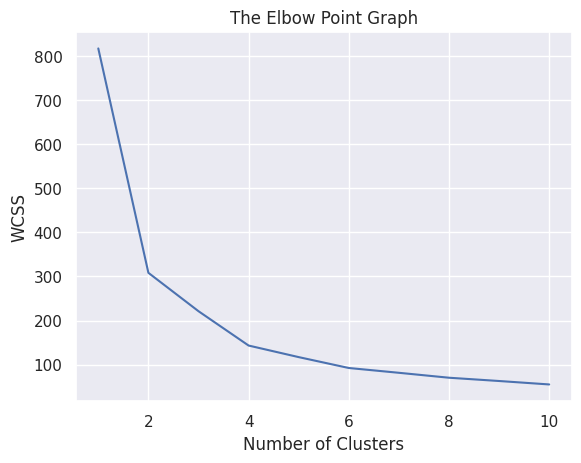

In [35]:
# plot an elbow graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS");

Optimal Number of Clusters = 4


#### Training the k-Means Clustering Model

In [36]:
# Feature Selection
X = df_cleaned.iloc[:, [2,4]].values


In [37]:
X

array([[  95.4 , 1000.  ],
       [   0.  , 7000.  ],
       [ 773.17, 7500.  ],
       ...,
       [ 144.4 , 1000.  ],
       [   0.  ,  500.  ],
       [1093.25, 1200.  ]])

In [38]:
# K-means clustering
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)


In [39]:
Y

array([1, 3, 3, ..., 1, 1, 1], dtype=int32)

In [40]:
Y.shape

(8664,)

In [41]:
import numpy as np

unique_values = np.unique(Y)
count_unique = len(unique_values)

print("Number of unique values:", count_unique)


Number of unique values: 4


Visualizing all the Clusters

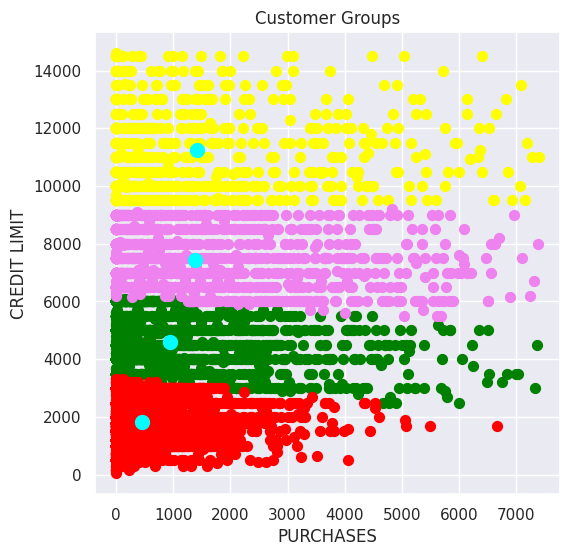

In [43]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c="green", label="Cluster 1")
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c="red", label="Cluster 2")
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c="yellow", label="Cluster 3")
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c="violet", label="Cluster 4")
#plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c="blue", label="Cluster 5")

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="cyan", label="Centroids")

plt.title("Customer Groups")
plt.xlabel("PURCHASES")
plt.ylabel("CREDIT LIMIT");

#Interpretation of Results.
There are 4 segmentations of customers and an approximate amount they spend on purchases and their credit_limit

1. Customers that spend [PURCHASES (0 - 5500)] and credit score[CREDIT SCORE(0 - 3000 )].
2. Customers that spend [PURCHASES (0 - 7500)] and credit score[CREDIT SCORE(3001 - 5800 )].
3. Customers that spend [PURCHASES (0 - 7500)] and credit score[CREDIT SCORE(5800 - 9400 )].
4. Customers that spend [PURCHASES (0 - 7500)] and credit score[CREDIT SCORE(9500 - 14500 )].

from the above results, i drew the following conclusions:
1. The maximum amount spent on purchases is 7500
2. There is a linear relationship between purchases and credit limit. customers with a lower credit limit make more purchases